<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries</b>

In [1]:
from Helpers import *

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Reading Merchant Dataset</b>

In [30]:
# Reading the dataset and Displaying the first rows of the data

merchants = pd.read_csv('merchants.csv')
merchants.head(3)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,9.667,3,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,1.750,3,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,260.000,2,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000


In [31]:
# Displaying the shape of the data

merchants.shape

(334696, 22)

In [32]:
# Define data types for each column to reduce memory usage

dtypes = {
    'merchant_id': 'category',
    'merchant_group_id': 'int32',
    'merchant_category_id': 'int16',
    'subsector_id': 'int8',
    'numerical_1': 'float32',
    'numerical_2': 'float32',
    'category_1': 'category',
    'most_recent_sales_range': 'category',
    'most_recent_purchases_range': 'category',
    'avg_sales_lag3': 'float32',
    'avg_purchases_lag3': 'float64',
    'active_months_lag3': 'int8',
    'avg_sales_lag6': 'float32',
    'avg_purchases_lag6': 'float64',
    'active_months_lag6': 'int8',
    'avg_sales_lag12': 'float32',
    'avg_purchases_lag12': 'float64',
    'active_months_lag12': 'int8',
    'category_4': 'category',
    'city_id': 'int16',
    'state_id': 'int8',
    'category_2': 'float32'  
}

- active_months_lag3, active_months_lag6, avg_sales_lag3, avg_sales_lag6, avg_purchases_lag3, and avg_purchases_lag6 are redundant features need to be removed.

In [33]:
# Drop uninformative and redundant columns 

merchants = merchants.drop(['merchant_group_id','merchant_category_id','city_id',
                            'avg_sales_lag3','avg_purchases_lag3','active_months_lag3','avg_sales_lag6','avg_purchases_lag6','active_months_lag6'],axis= 1)

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:180%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:1000;
            text-align:
            center;"><b>Data Cleaning</b>

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Handling Duplicated Values</b>

In [34]:
# Checking duplication in 'merchant_id' column

print(merchants['merchant_id'].shape[0])
print(merchants['merchant_id'].nunique())

334696
334633


In [35]:
# Remove duplicate rows on 'merchant_id' column

merchants.drop_duplicates(subset='merchant_id',inplace=True)

In [36]:
# Checking duplication after dropping the duplicated rows

merchants.duplicated().sum()

np.int64(0)

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Handling Missing Values</b>

In [37]:
# Checking null values in each column in merchant DataFrame

merchants.isnull().sum()

merchant_id                        0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
state_id                           0
category_2                     11863
dtype: int64

In [38]:
# Drop rows with null values in 'avg_sales_lag12' column 

merchants.dropna(subset='avg_sales_lag12',inplace=True)

In [39]:
# Calculate the mode of 'category_2' column

category_2_mode = merchants['category_2'].mode()[0]

print(f"Most Common in category_2 : {category_2_mode}")

Most Common in category_2 : 1.0


In [40]:
# Fill null values in 'category_2' column with its mode

merchants['category_2'].fillna(category_2_mode, inplace=True)

C:\Users\TPC-Store\AppData\Local\Temp\ipykernel_9672\3974670241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merchants['category_2'].fillna(category_2_mode, inplace=True)


In [41]:
# Checking the missing values after dropping the nulls

merchants.isnull().sum()

merchant_id                    0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
state_id                       0
category_2                     0
dtype: int64

In [42]:
# Iterate through each column and check for infinity values 

for col in merchants.columns: 
    has_inf = np.isinf(pd.to_numeric(merchants[col], errors='coerce')).any().any()
    if has_inf:
        print(f"{col} contains infinity values.")

In [43]:
merchants.describe().T

,count,mean,std,min,25%,50%,75%,max
subsector_id,334620.000,25.117,9.807,-1.000,19.000,27.000,33.000,41.000
numerical_1,334620.000,0.010,1.047,-0.057,-0.057,-0.057,-0.048,183.735
numerical_2,334620.000,0.007,1.032,-0.057,-0.057,-0.057,-0.048,182.079
avg_sales_lag12,334620.000,25.229,5252.336,-82.130,0.850,1.020,1.290,2567408.000
avg_purchases_lag12,334620.000,2.062,87.987,0.098,0.898,1.043,1.266,50215.556
active_months_lag12,334620.000,11.600,1.520,1.000,12.000,12.000,12.000,12.000
state_id,334620.000,11.862,6.176,-1.000,9.000,9.000,16.000,24.000
category_2,334620.000,2.331,1.556,1.000,1.000,1.000,4.000,5.000


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Handling Outliers</b>

In [44]:
# Display information about outliers

col = ['numerical_1','numerical_2','avg_sales_lag12','avg_purchases_lag12']
OutliersInfo(merchants, col)


numerical_1
-----------------------------------
Number of outlier samples produced by IQR: 48659
0% percentile value is -0.057
1% percentile value is -0.057
98% percentile value is 0.478
99% percentile value is 1.063
100% percentile value is 183.735

	- Number of values less than -0.057: 0
	- Number of values greater than 1.063: 3320

numerical_2
-----------------------------------
Number of outlier samples produced by IQR: 41030
0% percentile value is -0.057
1% percentile value is -0.057
98% percentile value is 0.458
99% percentile value is 1.043
100% percentile value is 182.079

	- Number of values less than -0.057: 0
	- Number of values greater than 1.043: 3318

avg_sales_lag12
-----------------------------------
Number of outlier samples produced by IQR: 35803
0% percentile value is -82.130
1% percentile value is 0.360
98% percentile value is 10.296
99% percentile value is 23.906
100% percentile value is 2567408.000

	- Number of values less than 0.360: 3185
	- Number of values gr

{'numerical_1': [4543,
  5345,
  7437,
  7484,
  8465,
  9987,
  10217,
  10666,
  10872,
  11531,
  11780,
  12063,
  12134,
  12631,
  12772,
  12794,
  13107,
  13192,
  13336,
  13517,
  13823,
  14050,
  14433,
  14629,
  14689,
  14765,
  14907,
  15033,
  15132,
  15177,
  15201,
  15381,
  15468,
  15625,
  15725,
  15726,
  15872,
  15885,
  15925,
  15961,
  16110,
  16228,
  16359,
  16622,
  16830,
  16836,
  16868,
  16871,
  16900,
  16903,
  16916,
  16921,
  16940,
  17122,
  17318,
  17405,
  17570,
  17723,
  17933,
  18141,
  18159,
  18183,
  18262,
  18427,
  18478,
  18567,
  18588,
  18709,
  18746,
  18769,
  18787,
  18918,
  19108,
  19147,
  19337,
  19428,
  19535,
  19543,
  19567,
  19742,
  19748,
  20015,
  20044,
  20185,
  20233,
  20285,
  20294,
  20558,
  20571,
  20628,
  20695,
  20831,
  20852,
  20857,
  20964,
  20986,
  21069,
  21200,
  21224,
  21377,
  21397,
  21398,
  21525,
  21530,
  21589,
  21592,
  21612,
  21654,
  21744,
  21760,
 

- The intersections between avg_purchases_lag12 and avg_sales_lag12 will be relatively large, since both represent average purchase and sales metrics. Their percentile ranges significantly overlap. numerical_1 and numerical_2 also overlap considerably.

- For all the columns, the 100 percentile value is much larger than the 99 percentile value, indicating that there may be extreme values that are much larger than the rest of the data. Also, the 0 percentile value is much lower than the 1 percentile value, indicating that there may be extreme values that are much larger than the rest of the data.

- I will remove the outliers and keep values whose percentile between 1% to 99%

In [45]:
# Filter merchants DataFrame based on specific conditions

merchants = merchants[(merchants['numerical_1'] < 2)]
merchants = merchants[(merchants['avg_sales_lag12'] > 0.36) & (merchants['avg_sales_lag12'] < 25)]
merchants = merchants[(merchants['avg_purchases_lag12'] > 0.45) & (merchants['avg_purchases_lag12'] < 25)]
merchants.shape

(324029, 13)

In [46]:
# Calculate the correlation matrix for numerical features

num_features = merchants.select_dtypes(exclude='object')
corrleations = num_features.corr()
corrleations

,subsector_id,numerical_1,numerical_2,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,state_id,category_2
subsector_id,1.000,-0.019,-0.013,0.006,0.016,-0.016,0.014,-0.012
numerical_1,-0.019,1.000,0.988,-0.029,-0.024,0.054,0.003,0.003
numerical_2,-0.013,0.988,1.000,-0.026,-0.023,0.051,0.001,0.001
avg_sales_lag12,0.006,-0.029,-0.026,1.000,0.786,-0.103,0.015,0.008
avg_purchases_lag12,0.016,-0.024,-0.023,0.786,1.000,-0.095,0.017,0.008
active_months_lag12,-0.016,0.054,0.051,-0.103,-0.095,1.000,0.006,0.000
state_id,0.014,0.003,0.001,0.015,0.017,0.006,1.000,0.120
category_2,-0.012,0.003,0.001,0.008,0.008,0.000,0.120,1.000


- The numerical_1 and numerical_2 alomst identical, So i will drop one of them.

In [47]:
# Drop the 'numerical_2' column  

merchants = merchants.drop(columns='numerical_2',axis=1)

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:180%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:1000;
            text-align:
            center;"><b>Visualization</b>

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Top 25 Subsectors</b>

In [48]:
Subsector_ID_Counts = merchants['subsector_id'].value_counts().head(25).reset_index()
Subsector_ID_Counts_sorted = Subsector_ID_Counts.sort_values(by='count',ascending=False)
Subsector_ID_Counts_sorted

,subsector_id,count
0,27,49926
1,37,34501
2,33,30214
3,34,25645
4,21,23416
5,29,20743
6,19,20023
7,16,16170
8,18,13760
9,20,9193


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='count', ylabel='subsector_id'>

Text(0.5, 1.0, 'Top 25 Subsectors')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Subsectors ID')

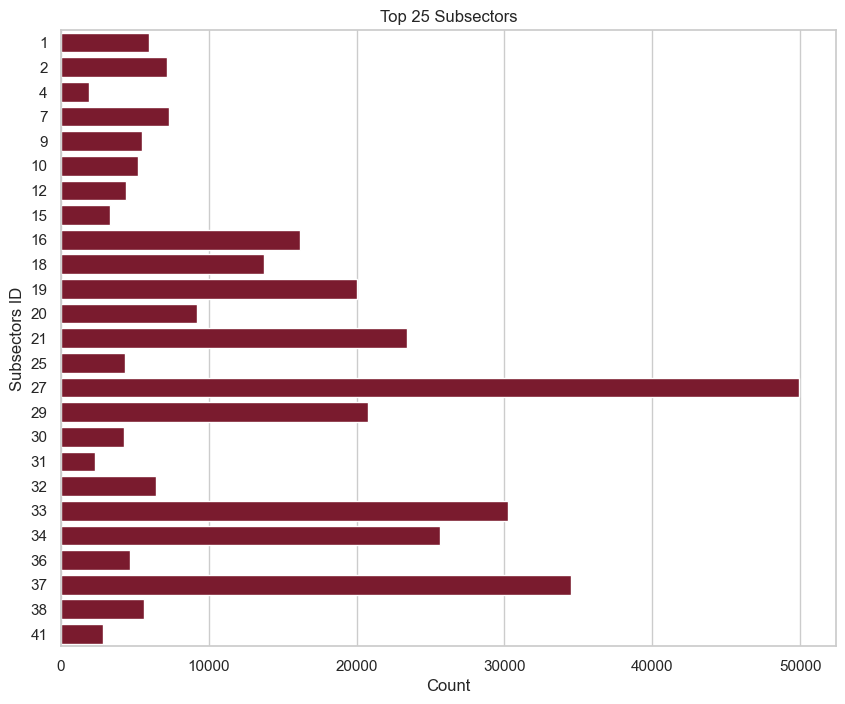

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(data=Subsector_ID_Counts_sorted,x='count',y='subsector_id' ,orient='h')
plt.title('Top 25 Subsectors')
plt.xlabel('Count')
plt.ylabel('Subsectors ID')
plt.show()

- Subsector 27 is the most dominant by a large margin, indicating a strong concentration of merchants in this category.
- Some subsectors (e.g., 33, 37) are also well-represented, while several others have much lower counts

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Distribution of Category 1</b>

In [50]:
category_1_count = merchants['category_1'].value_counts().reset_index()
category_1_count

,category_1,count
0,N,317489
1,Y,6540


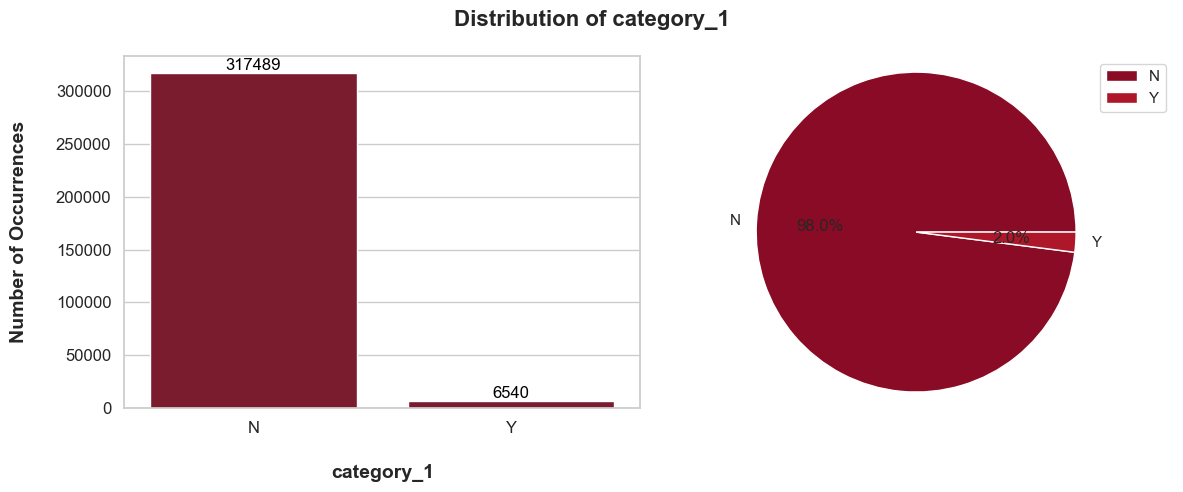

In [51]:
plot_categorical_feature(category_1_count)

- There is a significant class imbalance: 98% of entries are 'N' and only 2% are 'Y'

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Distribution of Most Recent Sales Range</b>

In [52]:
most_recent_sales_range_count = merchants['most_recent_sales_range'].value_counts().reset_index()
most_recent_sales_range_count

,most_recent_sales_range,count
0,E,171030
1,D,115004
2,C,33358
3,B,3945
4,A,692


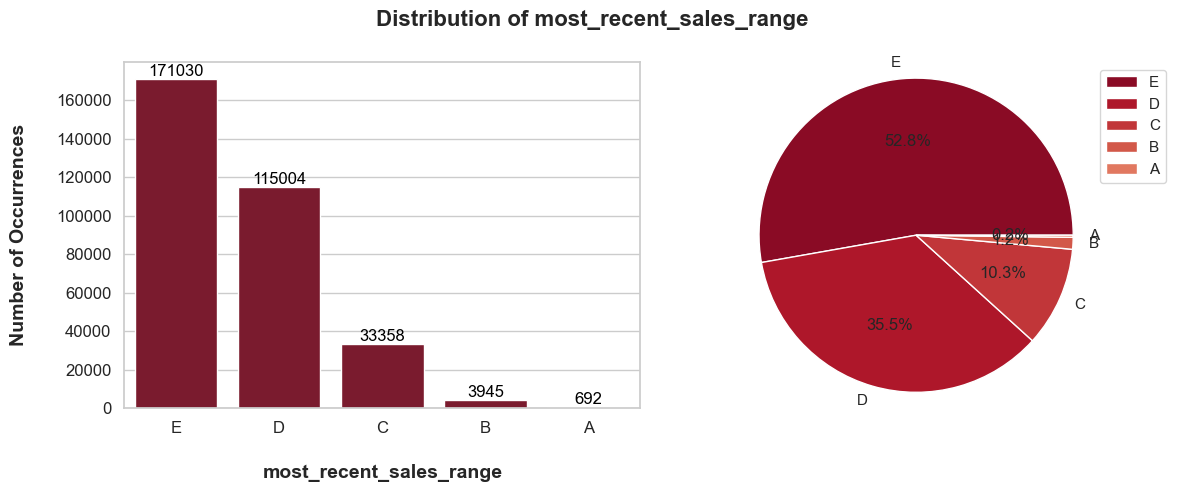

In [53]:
plot_categorical_feature(most_recent_sales_range_count)

- Most merchants fall into category E (52.8%) and D (35.5%) for sales range, while categories A and B are rare, indicating a skew towards higher or more recent sales.

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Distribution of Most Recent Purchase Range</b>

In [54]:
most_recent_purchases_range_count = merchants['most_recent_purchases_range'].value_counts().reset_index()
most_recent_purchases_range_count

,most_recent_purchases_range,count
0,E,167949
1,D,117878
2,C,33324
3,B,4280
4,A,598


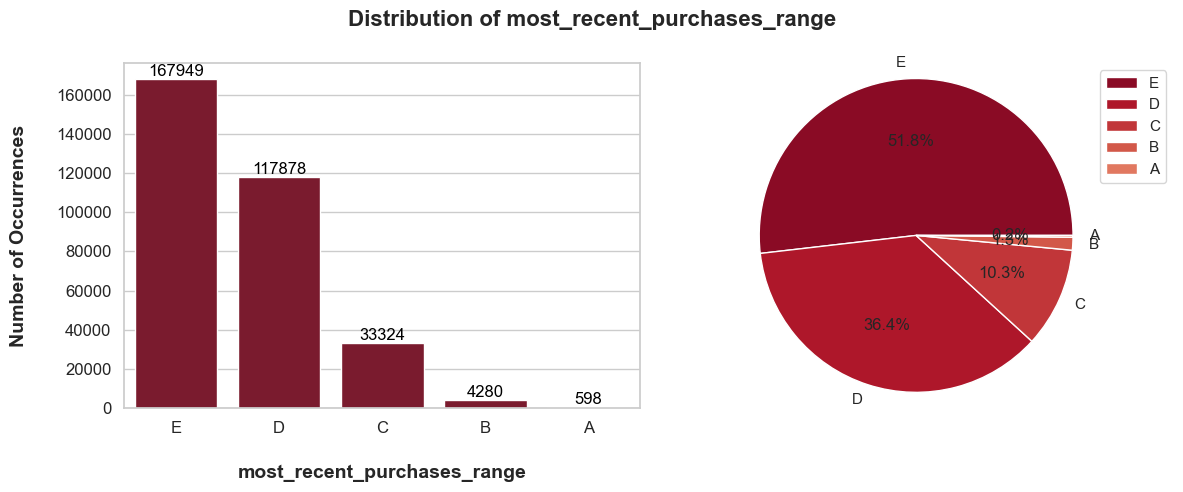

In [55]:
plot_categorical_feature(most_recent_purchases_range_count)

- The distribution is similar to sales: categories E and D dominate (51.8%, 36.4%), while A and B are minimally represented, again showing skewness toward recent or frequent purchases.

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Counts of Active Month Lag</b>

In [56]:
active_months_lag12_count = merchants['active_months_lag12'].value_counts().reset_index()
active_months_lag12_count

,active_months_lag12,count
0,12,296920
1,11,4017
2,10,3772
3,9,3485
4,8,3412
5,7,3008
6,6,2493
7,5,2096
8,4,1878
9,3,1544


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='count', ylabel='active_months_lag12'>

Text(0.5, 1.0, 'Counts of Active Month Lag')

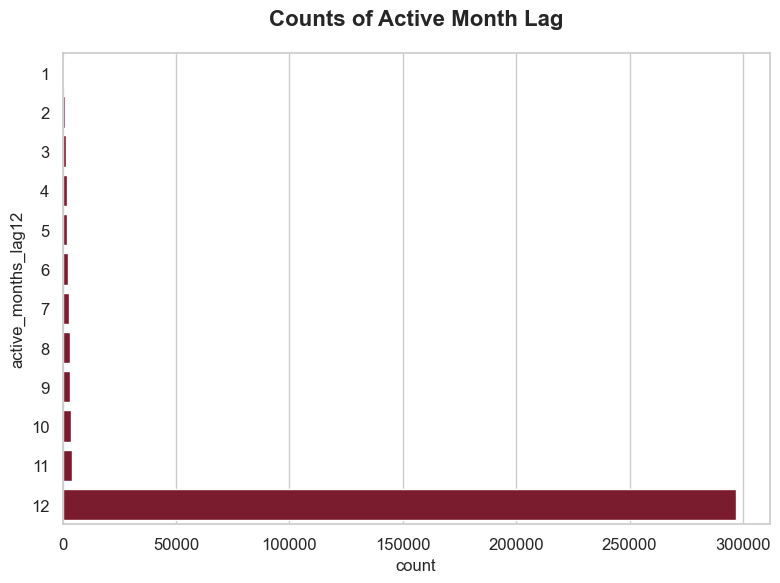

In [57]:
plt.figure(figsize=(8,6))
bar_plot(active_months_lag12_count,column='active_months_lag12',ax=plt.gca(),orient='h')
plt.title('Counts of Active Month Lag', weight = "bold", fontsize = 16, pad = 20)
plt.tight_layout()
plt.show()

- The majority of merchants (over 290,000) are active for all 12 months, and activity drops off sharply for shorter periods.

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Distribution of Category 4</b>

In [58]:
category_4_count = merchants['category_4'].value_counts().reset_index()
category_4_count

,category_4,count
0,N,231756
1,Y,92273


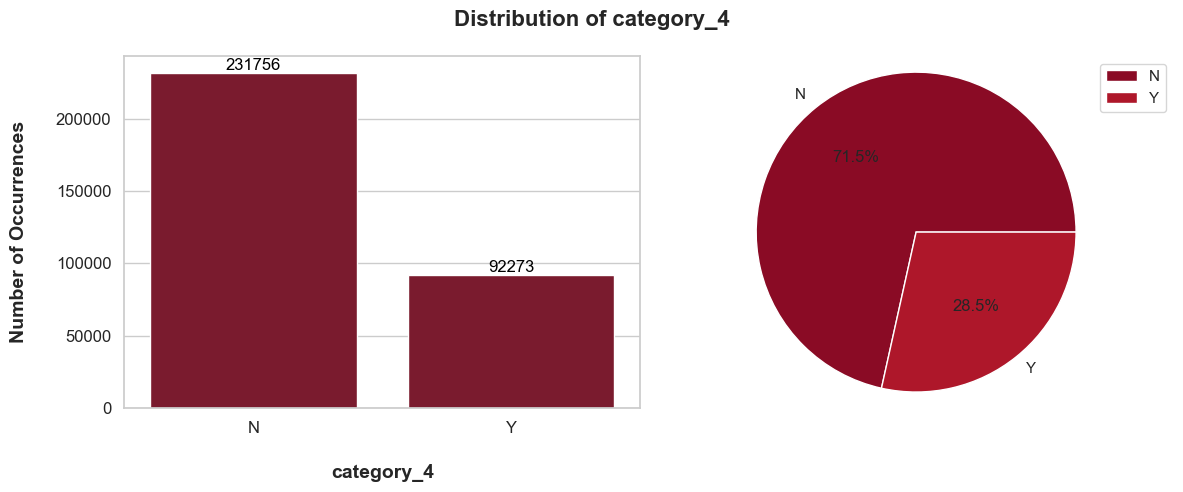

In [59]:
plot_categorical_feature(category_4_count)

- 71.5% of the values are 'N' and 28.5% are 'Y', showing some imbalance but both categories are reasonably represented

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Distribution of Category 2</b>

In [60]:
category_2_count = merchants['category_2'].value_counts().reset_index()
category_2_count

,category_2,count
0,1.000,167278
1,5.000,51254
2,3.000,50177
3,4.000,35255
4,2.000,20065


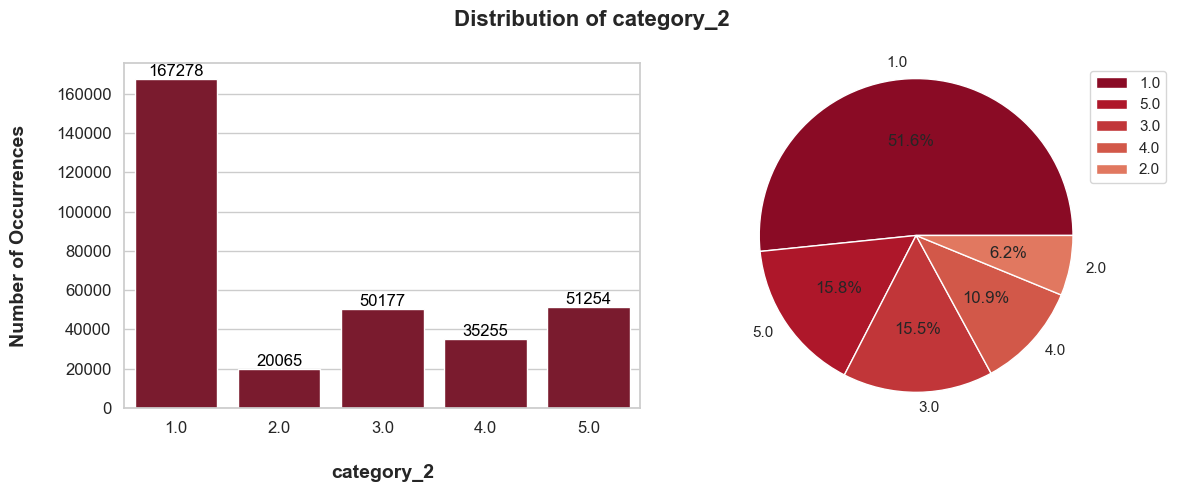

In [61]:
plot_categorical_feature(category_2_count)

- The distribution of Category 2 is noticeably skewed, with class 1 representing the majority (51.6%), while the other classes, especially 2 (6.2%), are much less frequent, indicating a moderate class imbalance.

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:180%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:1000;
            text-align:
            center;"><b>Data Preprocessing</b>

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Feature Encoding</b>

In [62]:
# Encode categorical features to numerical 

merchants['category_1'] = merchants['category_1'].map({'Y' : 1 , 'N' : 0})
merchants['category_4'] = merchants['category_4'].map({'Y' : 1 , 'N' : 0})

merchants['most_recent_sales_range'] = merchants['most_recent_sales_range'].map({'A': 1 , 'B': 2 , 'C': 3 , 'D': 4 , 'E': 5})
merchants['most_recent_purchases_range'] = merchants['most_recent_purchases_range'].map({'A': 1 , 'B': 2 , 'C': 3 , 'D': 4 , 'E': 5})

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Features Aggregations</b>

In [63]:
# Create Aggregation dictionary to define how to aggregate columns

aggregation = {
    'subsector_id': ['nunique',statistics.mode],
    'numerical_1':['mean','max','min','sum',statistics.mode],
    'category_1':[statistics.mode,'mean'],
    'most_recent_sales_range':[statistics.mode,'mean'],
    'most_recent_purchases_range':[statistics.mode,'mean'],
    'avg_sales_lag12':['mean','sum','max','min'],
    'avg_purchases_lag12':['mean','sum','max','min'],
    'active_months_lag12':[statistics.mode],
    'category_4':[statistics.mode,'mean'],
    'state_id':[statistics.mode,'nunique'],
    'category_2':[statistics.mode,'mean'],
}

In [64]:
# Group the 'merchants' by 'merchant_id' and apply the aggregations 

aggregate_merchants = merchants.groupby('merchant_id').agg(aggregation)
aggregate_merchants.head(3)

subsector_id      numerical_1                              \
                     nunique mode        mean    max    min    sum   mode   
merchant_id                                                                 
M_ID_000025127f            1   37      -0.057 -0.057 -0.057 -0.057 -0.057   
M_ID_0000699140            1   27      -0.057 -0.057 -0.057 -0.057 -0.057   
M_ID_00006a5552            1   29      -0.057 -0.057 -0.057 -0.057 -0.057   

                category_1       most_recent_sales_range        \
                      mode  mean                    mode  mean   
merchant_id                                                      
M_ID_000025127f          0 0.000                       5 5.000   
M_ID_0000699140          0 0.000                       4 4.000   
M_ID_00006a5552          0 0.000                       5 5.000   

                most_recent_purchases_range       avg_sales_lag12              \
                                       mode  mean            mean   sum   max   
merchant_id                                                                     
M_ID_000025127f                           5 5.000           1.080 1.080 1.080   
M_ID_0000699140                           4 4.000           1.240 1.240 1.240   
M_ID_00006a5552                           5 5.000           1.220 1.220 1.220   

                      avg_purchases_lag12                    \
                  min                mean   sum   max   min   
merchant_id                                                   
M_ID_000025127f 1.080               2.090 2.090 2.090 2.090   
M_ID_0000699140 1.240               1.155 1.155 1.155 1.155   
M_ID_00006a5552 1.220               1.036 1.036 1.036 1.036   

                active_months_lag12 category_4       state_id          \
                               mode       mode  mean     mode nunique   
merchant_id                                                             
M_ID_000025127f                  12          1 1.000        9       1   
M_ID_0000699140                  12          0 0.000        9       1   
M_ID_00006a5552                  12          0 0.000       15       1   

                category_2        
                      mode  mean  
merchant_id                       
M_ID_000025127f      1.000 1.000  
M_ID_0000699140      1.000 1.000  
M_ID_00006a5552      1.000 1.000

In [65]:
# Rename the columns of the 'aggregate_merchants' DataFrame

aggregate_merchants.columns = [str(uppers)+'_'+str(lowers).strip() for uppers,lowers in aggregate_merchants.columns.values]
aggregate_merchants  =aggregate_merchants.reset_index()
aggregate_merchants.head(3)

,merchant_id,subsector_id_nunique,subsector_id_mode,numerical_1_mean,numerical_1_max,numerical_1_min,numerical_1_sum,numerical_1_mode,category_1_mode,category_1_mean,most_recent_sales_range_mode,most_recent_sales_range_mean,most_recent_purchases_range_mode,most_recent_purchases_range_mean,avg_sales_lag12_mean,avg_sales_lag12_sum,avg_sales_lag12_max,avg_sales_lag12_min,avg_purchases_lag12_mean,avg_purchases_lag12_sum,avg_purchases_lag12_max,avg_purchases_lag12_min,active_months_lag12_mode,category_4_mode,category_4_mean,state_id_mode,state_id_nunique,category_2_mode,category_2_mean
0,M_ID_000025127f,1,37,-0.057,-0.057,-0.057,-0.057,-0.057,0,0.000,5,5.000,5,5.000,1.080,1.080,1.080,1.080,2.090,2.090,2.090,2.090,12,1,1.000,9,1,1.000,1.000
1,M_ID_0000699140,1,27,-0.057,-0.057,-0.057,-0.057,-0.057,0,0.000,4,4.000,4,4.000,1.240,1.240,1.240,1.240,1.155,1.155,1.155,1.155,12,0,0.000,9,1,1.000,1.000
2,M_ID_00006a5552,1,29,-0.057,-0.057,-0.057,-0.057,-0.057,0,0.000,5,5.000,5,5.000,1.220,1.220,1.220,1.220,1.036,1.036,1.036,1.036,12,0,0.000,15,1,1.000,1.000


In [66]:
# Display the number of rows and columns of 'aggregate_merchants'

aggregate_merchants.shape

(324029, 29)

In [67]:
# Save the 'aggregate_merchants' DataFrame to CSV file without the Index

aggregate_merchants.to_csv('Aggregate_Merchants.csv', index=False)
print("aggregate_merchants saved")

aggregate_merchants saved
